# Gradient Boosting 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,GridSearchCV

In [4]:
df=pd.read_csv("MagicBricks.csv")

In [5]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [6]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [7]:
df.shape

(1259, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [9]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [10]:
df.isnull().sum()/len(df)*100

Area            0.000000
BHK             0.000000
Bathroom        0.158856
Furnishing      0.397141
Locality        0.000000
Parking         2.621128
Price           0.000000
Status          0.000000
Transaction     0.000000
Type            0.397141
Per_Sqft       19.142176
dtype: float64

In [11]:
df.duplicated().sum()/len(df)*100

6.59253375694996

In [12]:
df

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [13]:
for i in df.columns:
    if df[i].isnull().sum()>0:
        if df[i].dtype=='O':
            df[i]=df[i].fillna(df[i].mode()[0])
        elif df[i].dtype=='int' or df[i].dtype=='float':
            df[i]=df[i].fillna(df[i].mean())

In [14]:
df.isnull().sum()/len(df)*100

Area           0.0
BHK            0.0
Bathroom       0.0
Furnishing     0.0
Locality       0.0
Parking        0.0
Price          0.0
Status         0.0
Transaction    0.0
Type           0.0
Per_Sqft       0.0
dtype: float64

In [15]:
for i in df.columns:
     print(i,df[i].unique(),'-------------',df[i].nunique())

Area [  800.       750.       950.       600.       650.      1300.
  1350.       985.      1100.       870.       630.       660.
   344.4448   550.      1150.       850.       900.       430.556
   914.9315   500.        28.      2160.      1500.      1080.
  1450.       810.      1710.      1650.      1280.      1260.
  1130.      1000.      2925.      1600.      1143.      8000.
   890.      1387.      1050.      1200.       700.      1700.
  1550.      1400.      1900.      1850.      1800.      1620.
  1540.      2300.      1560.       400.      1525.      2200.
  2880.      2700.      1575.      1675.       825.       875.
   450.       100.        75.       270.       444.       729.
  4050.      2400.       405.       666.      1360.      2170.
   720.      1030.       350.       980.       445.       380.
   680.      2500.      2800.       300.      1295.      4688.
  3901.       540.       976.      2900.      5025.      1135.
  2306.     22050.        45.      3510.      4

In [16]:
df.drop(columns=['Locality'],inplace=True)

In [17]:
for i in df.select_dtypes(include='object').columns:
    print(i,df[i].unique(),'-------------',df[i].nunique())

Furnishing ['Semi-Furnished' 'Furnished' 'Unfurnished'] ------------- 3
Status ['Ready_to_move' 'Almost_ready'] ------------- 2
Transaction ['New_Property' 'Resale'] ------------- 2
Type ['Builder_Floor' 'Apartment'] ------------- 2


In [18]:
# label encoding for ordinal data

In [19]:
df['Furnishing']=df['Furnishing'].replace({'Semi-Furnished':0,'Furnished':1, 'Unfurnished':2})

In [20]:
# one hot encoding for nominal data 

In [21]:
df=pd.get_dummies(columns=['Status','Transaction','Type'],drop_first=True,data=df)

In [22]:
df

,Area,BHK,Bathroom,Furnishing,Parking,Price,Per_Sqft,Status_Ready_to_move,Transaction_Resale,Type_Builder_Floor
0,800.0,3,2.0,0,1.0,6500000,15690.136542,1,0,1
1,750.0,2,2.0,0,1.0,5000000,6667.000000,1,0,0
2,950.0,2,2.0,1,1.0,15500000,6667.000000,1,1,0
3,600.0,2,2.0,0,1.0,4200000,6667.000000,1,1,1
4,650.0,2,2.0,0,1.0,6200000,6667.000000,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,2,3.0,55000000,12916.000000,1,0,1
1255,1050.0,3,2.0,0,3.0,12500000,12916.000000,1,1,1
1256,875.0,3,3.0,0,3.0,17500000,12916.000000,1,0,1
1257,990.0,2,2.0,2,1.0,11500000,12916.000000,1,1,1


# splitting of data into x and y

In [23]:
x=df.drop(columns=['Price'])
y=df['Price']

# segregate x and y in train and test data set

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [25]:
print("The shape of :",x_train.shape)
print("The shape of :",x_test.shape)
print("The shape of :",y_train.shape)
print("The shape of :",y_test.shape)

The shape of : (1007, 9)
The shape of : (252, 9)
The shape of : (1007,)
The shape of : (252,)


In [29]:
xg=xgb.XGBRegressor()

In [30]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
y_pred=xg.predict(x_test)

In [32]:
y_pred_train=xg.predict(x_train)

In [33]:
r2_score(y_pred,y_test)

0.8449128070616811

In [34]:
r2_score(y_pred_train,y_train)

0.9973308569925933

In [35]:
importance=pd.DataFrame({'Features Names':x_train.columns,'Importance':xg.feature_importances_})

In [36]:
Feature_Importance= importance.sort_values(by='Importance',ascending=False)

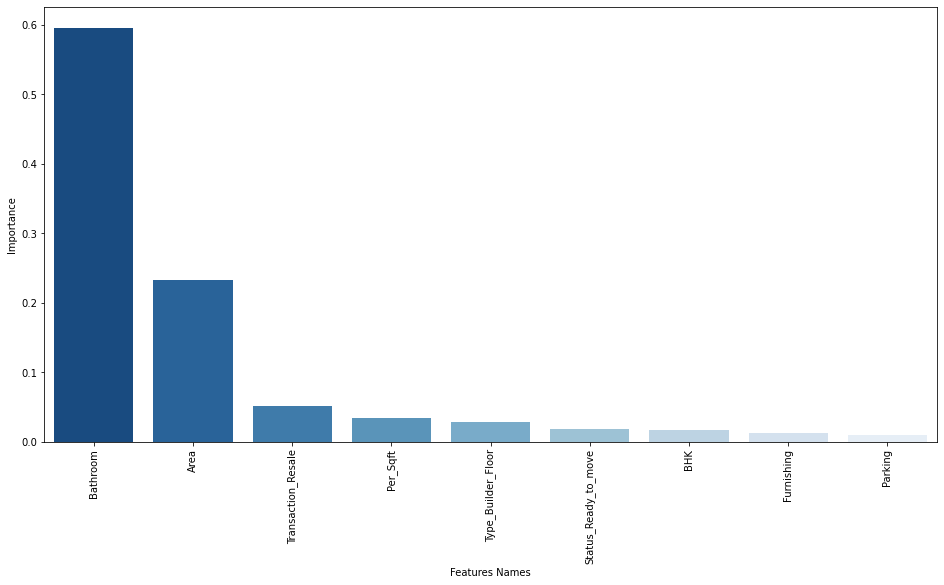

In [37]:
plt.figure(figsize=(16,8))
sns.barplot(x='Features Names',y='Importance',palette='Blues_r',data=Feature_Importance)
plt.xticks(rotation=90)
plt.show()